# Datamining Twitter with tweepy

Twitter is a worldwide database of human sentiment.  About 500 million new tweets go out per day([source](http://www.internetlivestats.com/twitter-statistics/)).  The ability to stream, parse and understand Twitter data at large scale has huge implications for marketing, humanitarian efforts, social sciences and many other ventures.  The combination of Twitter and deep-learning methods like sentimant analysis has lead to platforms like [SocialBro](http://www.socialbro.com/), which mine twitter data to provide in-depth analytics for businesses.  It is even possible to [track the entire emotional state of the world at any given time!](http://wefeel.csiro.au/#/)  As Python developers, we have access to easy-to-use tools to directly communicate with Twitter's data, and this puts a world of data right at our fingertips.

<br>

To make its data available, Twitter hosts a Representational State Transfer Application Programing Interface (REST API).  The API dictates what data twitter makes available, and REST refers to an architectural design pattern for building scalable web services.  These concepts are explained quite well in the video below.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('7YcW25PHnAA')

<br>

Many major webservices use RESTful APIs, so it's important to get familiar with these concepts.  In the video, it was shown how one can interact with an API through the browser itself, or through services like [apigee](http://apigee.com/about/).  However, we can also access the TwitterAPI through Python.  This enables us to integrate Twitter data with other Python resources like `numpy` `matplotlib` and `IPython`.

<br>

There are at least 7 python interfaces to Twitter's REST API.  We will use `tweepy`, since the [documentation is clear](http://www.tweepy.org/), and there are [interesting applications available to get started](http://adilmoujahid.com/posts/2014/07/twitter-analytics/
).

## Installing Tweepy

First you will need to install tweepy.  The most straightforward way is through the `pip` installation tool.  `Python >= 2.7.9` should come installed with pip, but for earlier versions, [see this guide for installing pip](https://pip.pypa.io/en/latest/installing.html).  This can be run from the command line using:

    pip install tweepy
    
or from within a Canopy IPython shell:

    %bash pip install tweepy
    
If you get this Exception:

    TypeError: parse_requirements() got an unexpected keyword argument 'session'


Make sure you upgrade pip to the newest version:

    pip install --upgrade pip
    
Alternatively, you can install `tweepy` from source by doing the following:

   - Go to the [tweepy repo](https://github.com/tweepy/tweepy)
   - Click *Download Zip*
   - Extract to a known directy (eg /path/to/Desktop)
   - Open a terminal and `cd` into that folder
   - Type `python setup.py install`


### Configuring Matplotlib

Let's import plotting functions (via pylab) and change default plot settings

In [2]:
#Import pylab, change some default matplotlib setting
%pylab inline

rcParams["figure.figsize"] = (12, 9) #<--- large default figures

# Plot text elements
rcParams['axes.labelsize'] = 17
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

Populating the interactive namespace from numpy and matplotlib


### Intro

Twitter uses the [OAuth protocol](https://dev.twitter.com/oauth/overview/faq) for secure application development.  Considering all of the applications that access Twitter (for example, using your Twitter account to login to a different website), this protocol prevents information like your password being passed through these intermediate accounts.  While this is a great security measure for intermediate client access, it adds an extra step for us before we can directly communicate with the API.  To access Twitter, you need to Create an App (https://apps.twitter.com)

<br>

**<font color='green'> If you are in the PSIS programming course, you will be provided with a consumer and access code via email, which is linked to a shared, dummy account and dummy app.</font>**

<br>

Store your consumer key and comumer secret somewhere you'll remember them.  I'm storing mine in Python strings, but for security, not displaying this step:

    consumer_key = 'jrCYD....'
    consumer_secret = '...' 
    

Here is a discussion on the difference between the access token and the consumer token; although, for our intents and purposes, its not so important: http://stackoverflow.com/questions/20720752/whats-the-difference-between-twitter-consumer-key-and-access-token**

```
The consumer key is for your application and client tokens are for end users in your application's context. If you want to call in just the application context, then consumer key is adequate. You'd be rate limited per application and won't be able to access user data that is not public. With the user token context, you'll be rate limited per token/user, this is desirable if you have several users and need to make more calls than application context rate limiting allows. This way you can access private user data. Which to use depends on your scenarios.
```

## Example 1: Read Tweets Appearing on Homepage

With the `consumer_key` and `consumer_secret` stored, let's try a Hello World example from Tweepy's docs.  This will access the public tweets appearing on the User's feed as if they had logged in to twitter.  **For brevity, we'll only print the first two**.

In [3]:
import tweepy

consumer_key = 'eDpwuOF0vafv0M2HIuD0bTnqy'
consumer_secret = 'JAJxnmcEUkdBNq5oIiBTs8dw5VU9vzMNci4Ds2DnI16fGXF2Lk'

access_token ='<ENTER YOURS HERE>'
access_token_secret = '<ENTER YOURS HERE>'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for (idx, tweet) in enumerate(public_tweets[0:3]): #First 3 tweets in my public feed
    print 'TWEET %s:\n\n\t%s\n\n' % (idx, tweet.text)

TWEET 0:

	IBM's CTO for Smarter Energy Research on "smart grids" in the Pacific Northwest http://t.co/kv2waSD2gK #ibmresearch @SmarterPlanet


TWEET 1:

	Soupy: a wrapper around BeautifulSoup that makes it easier to search through HTML and XML documents | http://t.co/cbJMsEwBvJ


TWEET 2:

	Bring #CS to your community! http://t.co/4j1oYjdjl4. Start, Volunteer, or Find a Club near you: http://t.co/qHOdSX9jMb #GWCClubs




When we used `tweet.text`, we implicitly used a python class defined by `tweepy`.

In [4]:
type(tweet)

tweepy.models.Status

There are many attributes associated with a `Status` object.  

In [5]:
tweet.__dict__.keys()

['contributors',
 'truncated',
 'text',
 'in_reply_to_status_id',
 'id',
 'favorite_count',
 '_api',
 'author',
 '_json',
 'coordinates',
 'entities',
 'in_reply_to_screen_name',
 'id_str',
 'retweet_count',
 'in_reply_to_user_id',
 'favorited',
 'source_url',
 'user',
 'geo',
 'in_reply_to_user_id_str',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'created_at',
 'in_reply_to_status_id_str',
 'place',
 'source',
 'retweeted']

## Example 2: What's trending where?

According to the [tweepy API](http://tweepy.readthedocs.org/en/v3.2.0/api.html), we can return the top 10 trending topics for a specific location, where the location is a `WOEID (Yahoo Where on Earth ID)`. 

<br>

The WOEID is a unique identifier, similar to zipcodes, but that expand worldwide.  For example, my hometown of Pittsburgh has a WOEID of 2473224.  You can search for WOEID's here: http://woeid.rosselliot.co.nz/

<br>

Let's return the top ten trending topics in Pittsburgh

In [6]:
top10 = api.trends_place(id=2473224)
top10

[{u'as_of': u'2015-04-07T15:17:10Z',
  u'created_at': u'2015-04-07T15:13:53Z',
  u'locations': [{u'name': u'Pittsburgh', u'woeid': 2473224}],
  u'trends': [{u'name': u'#NationalBeerDay',
    u'promoted_content': None,
    u'query': u'%23NationalBeerDay',
    u'url': u'http://twitter.com/search?q=%23NationalBeerDay'},
   {u'name': u'New Castle',
    u'promoted_content': None,
    u'query': u'%22New+Castle%22',
    u'url': u'http://twitter.com/search?q=%22New+Castle%22'},
   {u'name': u'Duke',
    u'promoted_content': None,
    u'query': u'Duke',
    u'url': u'http://twitter.com/search?q=Duke'},
   {u'name': u'#OpeningDay',
    u'promoted_content': None,
    u'query': u'%23OpeningDay',
    u'url': u'http://twitter.com/search?q=%23OpeningDay'},
   {u'name': u'Grayson Allen',
    u'promoted_content': None,
    u'query': u'%22Grayson+Allen%22',
    u'url': u'http://twitter.com/search?q=%22Grayson+Allen%22'},
   {u'name': u'Rand Paul',
    u'promoted_content': None,
    u'query': u'%22Rand+P

The result is a `JSON` object.  JSON is a human and machine-readable standardized data encoding format.  

<br>

In Python, JSON objects are implemented as lists of nested dictionaries.  JSON stands for JavaScript Object Notation, because it's designed based on a subset of the JavaScript language; however, JSON is a data-encoding format implemented in many languages.  

<br>

Looking at this structure, we see that it's contained in a list; in fact its a list of one element.  Let's access the top ten tweet names:

In [7]:
top10[0]['trends']

[{u'name': u'#NationalBeerDay',
  u'promoted_content': None,
  u'query': u'%23NationalBeerDay',
  u'url': u'http://twitter.com/search?q=%23NationalBeerDay'},
 {u'name': u'New Castle',
  u'promoted_content': None,
  u'query': u'%22New+Castle%22',
  u'url': u'http://twitter.com/search?q=%22New+Castle%22'},
 {u'name': u'Duke',
  u'promoted_content': None,
  u'query': u'Duke',
  u'url': u'http://twitter.com/search?q=Duke'},
 {u'name': u'#OpeningDay',
  u'promoted_content': None,
  u'query': u'%23OpeningDay',
  u'url': u'http://twitter.com/search?q=%23OpeningDay'},
 {u'name': u'Grayson Allen',
  u'promoted_content': None,
  u'query': u'%22Grayson+Allen%22',
  u'url': u'http://twitter.com/search?q=%22Grayson+Allen%22'},
 {u'name': u'Rand Paul',
  u'promoted_content': None,
  u'query': u'%22Rand+Paul%22',
  u'url': u'http://twitter.com/search?q=%22Rand+Paul%22'},
 {u'name': u'#BadChoiceFuneralSongs',
  u'promoted_content': None,
  u'query': u'%23BadChoiceFuneralSongs',
  u'url': u'http://twit

As you can see, there's alot of metadata that goes into even a simple tweet.  Let's cycle through each of these trends, and print the `name` and website of each.

In [8]:
for trend in top10[0]['trends']:
    print trend['name'], trend['url']

#NationalBeerDay http://twitter.com/search?q=%23NationalBeerDay
New Castle http://twitter.com/search?q=%22New+Castle%22
Duke http://twitter.com/search?q=Duke
#OpeningDay http://twitter.com/search?q=%23OpeningDay
Grayson Allen http://twitter.com/search?q=%22Grayson+Allen%22
Rand Paul http://twitter.com/search?q=%22Rand+Paul%22
#BadChoiceFuneralSongs http://twitter.com/search?q=%23BadChoiceFuneralSongs
#WorldHealthDay http://twitter.com/search?q=%23WorldHealthDay
James Best http://twitter.com/search?q=%22James+Best%22
#stlwx http://twitter.com/search?q=%23stlwx


### Example 3: Search

We can mine `tweets` using either *search* or *stream*.  

<br>

**The key difference between stream and search is that stream provides new data as it comes in, while search can be used to query old data.**  The search API is more powerful for queries, and provides faster access to a wide-range of data.  Check out [1400DEV for more about search vs. stream](http://140dev.com/twitter-api-programming-tutorials/aggregating-tweets-search-api-vs-streaming-api/).  

<br>

Before going forward, you can try doing some search query through Twitter's webpage.

https://twitter.com/search-advanced

<br>


Twitter employs a special query language.  For example, the query *"traffic?"* will return tweets that contain the word traffic and are phrased as a question.  [Check out more examples here](https://dev.twitter.com/rest/public/search).

<br>

Search is implemented directly through `tweepy.api`.  Let's search for a single tweet about traffic, phrased as a question. 

In [9]:
results = api.search(q='traffic?', count=1)
print type(results)

<class 'tweepy.models.SearchResults'>


The result is a `tweepy.models.SearchResults` class (see other tweepy's models [here](https://github.com/tweepy/tweepy/blob/master/tweepy/models.py).
).  Rather than just dumping a bunch of JSON data on us, the `tweepy api` has decoded the JSON and put it into a more pythonic object.  So for example, we can access the message in the tweet via python attribute access. 

In [10]:
print 'CREATED: %s\n%s\n\n' % (results[0].created_at, results[0].text)

CREATED: 2015-04-07 15:16:51
RT @scontorno: Have an outstanding parking ticket or traffic fine? Pay it April 18 without the late fee. http://t.co/m79I3w9Wdx




Let's find 5 tweets that contains the word "beefsteak" near Washington DC.   We can provide this as a `geocode`, a lattitude, longitude and radius string, which I looked up for GWU on Google Maps.  We can also specify how far back to look in time; in this case, don't show anything prior to 3/25/2015.  

In [11]:
for tweet in api.search(q='beefsteak since:2015-3-25', count=5, show_user=False,
                        geocode='38.899722,-77.048363,5mi'):
    print tweet.created_at, '\n',  tweet.text, '\n\n'

2015-04-07 01:51:30 
RT @javiermunoz0909: .@soniamey @opsoms @GillesCollette Guys here is my #SafeFood contribution:) from @beefsteak by chef @chefjoseandres ht… 


2015-04-07 00:46:10 
RT @javiermunoz0909: .@soniamey @opsoms @GillesCollette Guys here is my #SafeFood contribution:) from @beefsteak by chef @chefjoseandres ht… 


2015-04-07 00:04:24 
.@soniamey @opsoms @GillesCollette Guys here is my #SafeFood contribution:) from @beefsteak by chef @chefjoseandres http://t.co/tMTFlI2i2t 


2015-04-06 22:46:09 
from Chef José Andrés (at @Beefsteak in Washington, DC) https://t.co/5IeRZGRVvo 


2015-04-03 19:25:54 
Finally made it over to @chefjoseandres' @beefsteak. Kimchi-wa. Review to follow. http://t.co/7QJ6ilx1r1 




## Example 4: Streaming and Data Mining

*This Streaming tutorial follows closely [Adil Moujahid's great tweepy streaming example](http://adilmoujahid.com/posts/2014/07/twitter-analytics/)*

<br>

Twitter offers a [Streaming API](https://dev.twitter.com/streaming/overview) to make it easier to query streams of tweets.  The Stream API encapsulates some pain points of REST access to ensure that Stream calls don't exceed the rate limit.  Think of them as Twitter's suggested means to stream data for beginners.  You don't have to use them, but they're recommended and will make life easier.  There are three stream types:

   - `Public Streams:` Streams of public data flowthing through Twitter.  Suitable for followign specific users, topics or for data mining.
    
   - `User Streams:` Single-user streams.  Containing roughly all of the data corresponding with a single user's view of Twitter.
    
   - `Site Streams:`  The multi-user version of user streams.  
   
<br>
    
We'll resist the temptation to mess with our friend's Twitter accounts, and focus soley on `Public Streams`.  Combining these stream with text filters will let us accumulate content.  For example, we could look for tweets involving the text, *foxnews*.  `tweepy` and `Twitter's API` will configure the stream and filter to work nicely, you just provide the content tags you're interested in.  Finally, **remember that the more obsucre the content, the longer it will take to find**.

<br>

**<font color='red'>The following snippet will run until `max_tweets` or `max_seconds` is reached.  If running in notebook, it will hold up cells until the alotted time.  Therefore, for long runtimes, you may want to run in an external python program, and then can terminate at will if desired.  I also recommend restarting notebook kernal before running this cell multiple times...</font>**  

In [43]:
#Import the necessary methods from tweepy library
import sys
import time
import datetime

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#This is a basic listener that just prints received tweets to stdout.
class StreamParser(StreamListener):
    """ Controls how streaming data is parsed. Pass an outfile, or data will be writting to 
    sys.stdout (eg the screen)
    """
    def __init__(self, outfile=None, max_tweets=5, max_seconds=30):
        self.counter = 0
        self.start_time = time.time()
        # Set upper limits on maximum tweets or seconds before timeout
        self.max_tweets = max_tweets
        self.max_seconds = max_seconds
        if outfile:
            self.stdout = open(outfile, 'w')
        else:
            self.stdout = sys.stdout
    
    def on_data(self, data):
        """ Data is a string, but formatted for json. Parses it"""
        self.counter += 1
        # time data is all timestamps.
        current_time = time.time()
        run_time = current_time - self.start_time
                
        # If we want to read time, easiest way is to convert from timestamp using datetime
        formatted_time = datetime.datetime.now()
            
        # Technically, might not be the best place to put kill statements, but works well enough
        if self.max_tweets:
            if self.counter > self.max_tweets:
                self._kill_stdout()
                raise SystemExit('Max tweets of %s exceeded.  Killing stream... see %s' \
                             % (self.max_tweets, self.stdout))
  
        if self.max_seconds:
            if run_time > self.max_seconds:
                self._kill_stdout()
                raise SystemExit('Max time of %s seconds exceeded.  Killing stream... see %s' \
                                 % (self.max_seconds, self.stdout))

        print 'Tweet %s at %s.\nEllapsed: %.2f seconds\n' % \
             (self.counter, formatted_time, run_time)

        # Write to file, return True causes stream to continue I guess...
        self.stdout.write(data)
        return True

    def _kill_stdout(self):
        """ If self.stdout is a file, close it.  If sys.stdout, pass"""
        if self.stdout is not sys.stdout:
            self.stdout.close() 
    
    def on_error(self, status):
        print status


#This handles Twitter authetification and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Stream 10 tweets, no matter the time it takes!
listener = StreamParser(outfile='test.txt', max_tweets=5, max_seconds=None)
stream = Stream(auth, listener)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['obama', 'kenya', 'shabab', 'puppies'])

Tweet 1 at 2015-04-02 21:19:19.315274.
Ellapsed: 0.79 seconds

Tweet 2 at 2015-04-02 21:19:19.411817.
Ellapsed: 0.88 seconds

Tweet 3 at 2015-04-02 21:19:19.642709.
Ellapsed: 1.11 seconds

Tweet 4 at 2015-04-02 21:19:19.805070.
Ellapsed: 1.27 seconds

Tweet 5 at 2015-04-02 21:19:19.862497.
Ellapsed: 1.33 seconds



SystemExit: Max tweets of 5 exceeded.  Killing stream... see <closed file 'test.txt', mode 'w' at 0x7fa87d0498a0>

To exit: use 'exit', 'quit', or Ctrl-D.


### How is Python translated into REST?

`stream.filter()`, which actually returned the tweets, is a method of the class `tweepy.Stream`.  `Stream` provides a Python to frontend, and on the backend sends HTTP requests to Twitter [as described here](https://dev.twitter.com/streaming/overview/request-parameters).  We could have avoided Python altogether and just sent HTTP requests directly, but this is laborious.

<br>

Because `tweepy` is open-source, we can look at the source code for the `Stream` class, [here](https://github.com/tweepy/tweepy/blob/master/tweepy/streaming.py#L179).  Specifically, let's try to understand what the `filter` method is doing.  Let's look at the `filter` source code explicitly:

    def filter(self, follow=None, track=None, async=False, locations=None,
                stall_warnings=False, languages=None, encoding='utf8'):
  
        self.body = {}
        self.session.headers['Content-type'] = "application/x-www-form-urlencoded"
        if self.running:
            raise TweepError('Stream object already connected!')
        self.url = '/%s/statuses/filter.json' % STREAM_VERSION
        if follow:
            self.body['follow'] = u','.join(follow).encode(encoding)
        if track:
            self.body['track'] = u','.join(track).encode(encoding)
        if locations and len(locations) > 0:
            if len(locations) % 4 != 0:
                raise TweepError("Wrong number of locations points, "
                                 "it has to be a multiple of 4")
            self.body['locations'] = u','.join(['%.4f' % l for l in locations])
        if stall_warnings:
            self.body['stall_warnings'] = stall_warnings
        if languages:
            self.body['language'] = u','.join(map(str, languages))
        self.session.params = {'delimited': 'length'}
        self.host = 'stream.twitter.com'
        self._start(async)
        
        
<br>

Essentially, keywords like `track` and `locations` can be used to customize what types of tweets are streamed.  `tweepy` translates these into a series of `HTTP requests` and sends them to the TwitterAPI.  For example, we can see how `track` is interpreted by the [Twitter RESTAPI here](https://dev.twitter.com/streaming/overview/request-parameters#track).  

### Loading streamed data

While `search` returned python objects, `stream` returns raw `JSON` data.  The `search API` translated JSON data into more convienent [python objects](https://github.com/tweepy/tweepy/blob/master/tweepy/models.py); however, to parse the Stream data, we'll have to work with JSON data directly.  This is a good exercise, because JSON is widely used and its important to get familiar with.

<br>

If only one tweet were saved, we could just use json.loads() to read it in right away, but
for a file with multiple tweets, we need to [read them in one at a time](http://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data). 

<br>

Each tweet JSON object is one long line, so we can read in line by line, until an error is reached in which case we just stop.  Let's load in the file `streamed_5000.txt`, which stores 5000 tweets (about 21 MiB filesize) for the keywords 'obama' 'shabab' 'puppies' 'kenya'.  These keywords were chosen so we can do sentiment analysis later. 

In [20]:
import json

tweets = []
for line in open('streamed_5000.txt', 'r'):
    tweets.append(json.loads(line))

In [21]:
len(tweets)

5000

The tweet text itself is embedded in the `text` metadata field

In [22]:
tweets[0]['text']

u'RT @cnni: 147 killed in university massacre, deadliest terror attack in Kenya since U.S. Embassy bombed in 1998 http://t.co/ca4lefmpWT #Gar\u2026'

Check out all of the metadata you can get from a tweet! 

In [23]:
sorted(tweets[0].keys())

[u'contributors',
 u'coordinates',
 u'created_at',
 u'entities',
 u'favorite_count',
 u'favorited',
 u'filter_level',
 u'geo',
 u'id',
 u'id_str',
 u'in_reply_to_screen_name',
 u'in_reply_to_status_id',
 u'in_reply_to_status_id_str',
 u'in_reply_to_user_id',
 u'in_reply_to_user_id_str',
 u'lang',
 u'place',
 u'possibly_sensitive',
 u'retweet_count',
 u'retweeted',
 u'retweeted_status',
 u'source',
 u'text',
 u'timestamp_ms',
 u'truncated',
 u'user']

Within these fields, there's even more information.  For example, the `user` and `entities` fields, which provide information about the `user` as well as links and images (entities) embedded in the tweet:

In [24]:
tweets[0]['user']

{u'contributors_enabled': False,
 u'created_at': u'Tue Jul 06 02:14:03 +0000 2010',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'vivir y dejar vivir  respetar y tener compasion de mis semejantes.',
 u'favourites_count': 2789,
 u'follow_request_sent': None,
 u'followers_count': 577,
 u'following': None,
 u'friends_count': 726,
 u'geo_enabled': True,
 u'id': 163301786,
 u'id_str': u'163301786',
 u'is_translator': False,
 u'lang': u'en',
 u'listed_count': 2,
 u'location': u'u.s.a.',
 u'name': u'Imelda Villegas',
 u'notifications': None,
 u'profile_background_color': u'131516',
 u'profile_background_image_url': u'http://abs.twimg.com/images/themes/theme14/bg.gif',
 u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme14/bg.gif',
 u'profile_background_tile': True,
 u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/163301786/1380096319',
 u'profile_image_url': u'http://pbs.twimg.com/profile_images/37880000052003000

In [25]:
tweets[0]['entities']

{u'hashtags': [{u'indices': [135, 140], u'text': u'GarissaAttack'}],
 u'symbols': [],
 u'trends': [],
 u'urls': [{u'display_url': u'cnn.it/1yDCrfp',
   u'expanded_url': u'http://cnn.it/1yDCrfp',
   u'indices': [112, 134],
   u'url': u'http://t.co/ca4lefmpWT'}],
 u'user_mentions': [{u'id': 2097571,
   u'id_str': u'2097571',
   u'indices': [3, 8],
   u'name': u'CNN International',
   u'screen_name': u'cnni'}]}

Check out this infographic on all of the metadata in a tweet, taken from [Slaw: Canada's online legal magazine](http://www.slaw.ca/2011/11/17/the-anatomy-of-a-tweet-metadata-on-twitter/).  Is this ethical?

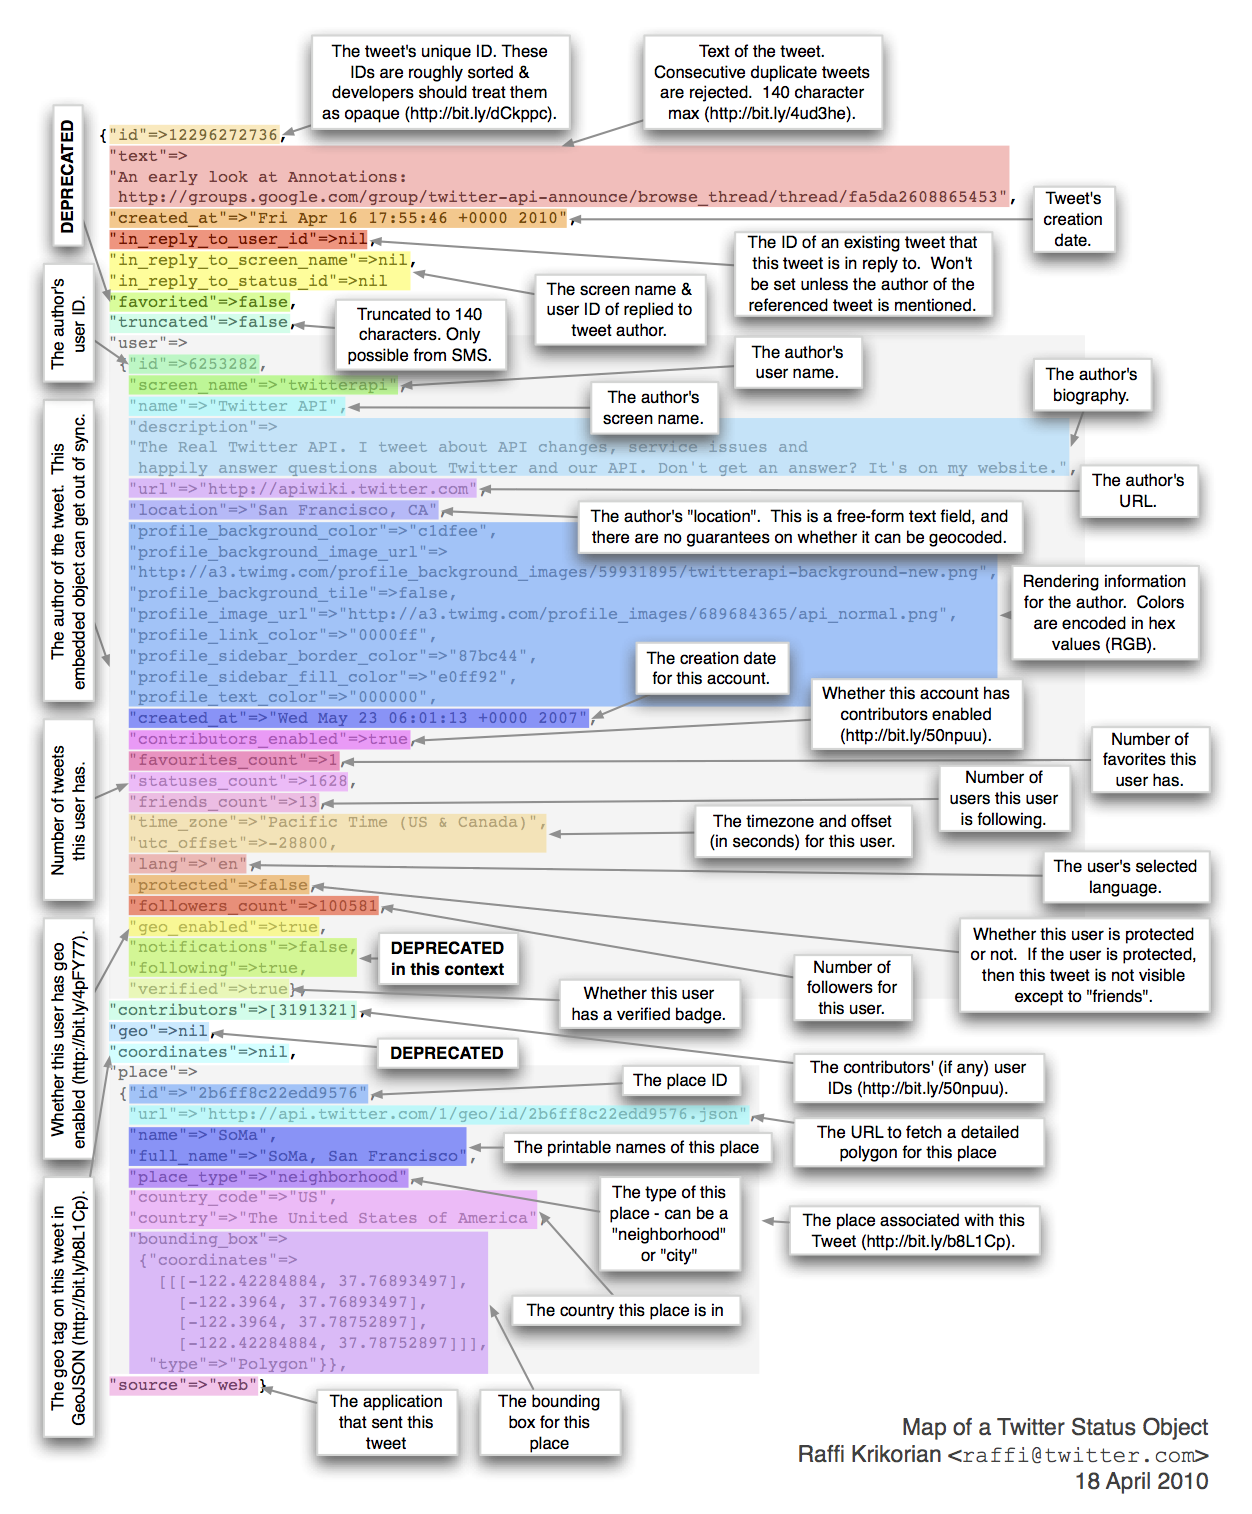

In [26]:
from IPython.display import Image

Image('http://www.slaw.ca/wp-content/uploads/2011/11/map-of-a-tweet-copy.png')

### 

### Parsing the data with pandas

Let's put these tweets into a pandas DataFrame, which make it easier to manipulate and visualize the data.  The frame will have 5000 rows, 1 for each tweet, and as many columns as fields.  Let's only keep the following fields for brevity: `text`, `lang`, `country`

Sometimes stream will return firehose-excess.  Need to just cut those tweets out... (https://twittercommunity.com/t/what-does-this-mean-limit-track-65/7463).  If you are getting unexpected KeyErrors, and uncomment the cells below and rerun.

In [27]:
#out = []
#for t in tweets:
#    try:
#        t['user']
#    except KeyError:
#        print t
#    else:
#        out.append(t)
        
#tweets[:] = out

In [28]:
import pandas as pd

names = map(lambda x: x['user']['name'], tweets)

tweets_frame = pd.DataFrame(index=names)

tweets_frame['text'] = map(lambda x: x['text'], tweets)
tweets_frame['lang'] = map(lambda x: x['lang'], tweets)
tweets_frame['followers'] = map(lambda x: x['user']['followers_count'], tweets)

             
tweets_frame['country'] = map(lambda x: x['place']['country'] if x['place'] != None 
                              else None, tweets)

Let's print the dataframe.  Typically, one can show this as an html table in the notebook, but some of the characters in the tweets are not rendering nicely, so use `print tweets_frame` to ensure it's printed as text.

In [29]:
print tweets_frame

                                                                   text lang  \
Imelda Villegas       RT @cnni: 147 killed in university massacre, d...   en   
Dr. Will              RT @SaeedKD: This is quite ground-breaking: Ir...   en   
Jlk                   RT @AnnCoulter: Obama cites Reagan's deal-maki...   en   
Michael McDonald      Some preliminary bowing. Keep a good thought. ...   en   
Lisa Todd Sutton      RT @pari_passu: Goodnight. Remember: While Rep...   en   
JG PALOMINO           RT @Godwetrust777: Surprising Numbers of Ameri...   en   
aracelymartinez       RT @progressivepush: But #GOPWantsWar  Breakth...   en   
June bugg             RT @peterwaldronusa: Iran's Zarif, echoing pre...   en   
Azad Bagok            RT @megalokornea: Hoşgörü dininin mücahidleri ...   tr   
Charlie Evans         RT @WayneDupreeShow: If I have to hear Obama s...   en   
Terry O.              @bimmerella Pat's with Obama on this. Surprisi...   en   
giana// matt tl       @moneyespinosa lol

So who has the most and least followers of all the tweets collected?  We can use dataframe `max` and `idxmax` methods to help us.

In [30]:
print 'MAX'
print tweets_frame['followers'].max(), tweets_frame['followers'].idxmax()

print '\nMIN'
print tweets_frame['followers'].min(), tweets_frame['followers'].idxmin()

MAX
4696296 La Patilla

MIN
0 Bolivard


We can bin the tweets by country, or other field, quite easily (although the country for most tweets is unknown).  Keep in mind that the country distribution is highly dependent on time of day!

In [31]:
tweets_by_country = tweets_frame['country'].value_counts()
print tweets_by_country

United States             36
Venezuela                  4
Kenya                      3
United Kingdom             2
Argentina                  2
Colombia                   1
Sverige                    1
Australia                  1
Nigeria                    1
Norge                      1
Republika ng Pilipinas     1
Jamaica                    1
پاکستان                    1
Canada                     1
dtype: int64


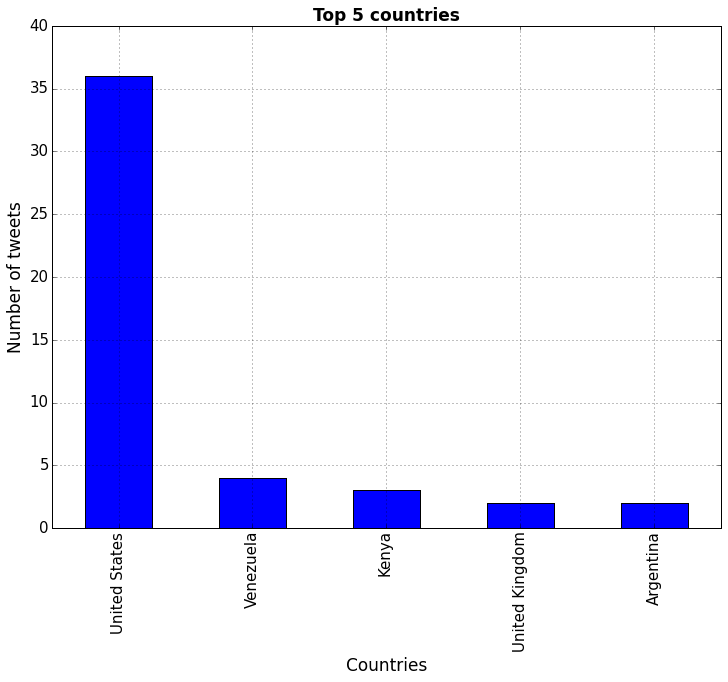

In [32]:
tweets_by_country[:5].plot(kind='bar', color='blue', fontsize=15)

plt.xlabel('Countries')
plt.ylabel('Number of tweets')
plt.title('Top 5 countries', fontweight='bold');

Let's look at 5 tweets from the US

In [33]:
tweets_frame[tweets_frame['country'] == 'United States'][0:5]

,text,lang,followers,country
Terry O.,@bimmerella Pat's with Obama on this. Surprisi...,en,3795,United States
lex,would anyone like to go look at puppies tomorrow,en,508,United States
Jason Taylor,Gretta asked about Time's 100? On second thoug...,en,232,United States
Marty Smith,@GoldsteinBrooke can't be true as Obama &amp; ...,en,173,United States
nancy r. strong,"#WydenWatch picket outside Chamber meeting, Ob...",en,1346,United States


Let's break down the dataframe based on string matches to our initial search terms, `puppies`, `kenya`, `shabab`, `obama`.  To extract dataframe entries containing a certain string, see http://stackoverflow.com/questions/19169649/using-str-contains-in-pandas-with-dataframes.  We'll convert all tweets to lowercase to ensure case-insensitive searching.

In [34]:
def extract(expression):
    """ Extra string expression (all lowercase) """
    text_lower = tweets_frame['text'].str.lower()
    return tweets_frame[text_lower.str.contains(expression, na=False)]

# Store into subsets
puppies, shabab, kenya, obama = map(extract, ['puppies', 'shabab', 'kenya', 'obama'])

for attr in ['puppies', 'shabab', 'kenya', 'obama']:
    print '%s: %s entries' % (attr, len(extract(attr)))

puppies: 282 entries
shabab: 107 entries
kenya: 1278 entries
obama: 3265 entries


This may exceed 5000, as Al-Shabab, Kenya and perhaps Obama are likely to be mentioned in the same tweets.  

<br>

So far we've looked at some basic statistics, and quantitative information about the Tweets.  However, important information is implicitly locked away in the Tweet content.  For example, how are people reacting to the events ocurring in Kenya?  To extract meaningful sentiment implicit in Tweet's, we'll have to cross into the realm of deep learning and natural language processing.

### Deep Learning and Natural Language Processing

Deep Learning is an avenue to artificial intelligence, enabling computers to process unstructured data (images, text articles, tweets, comments and complaints etc...), and try to infer the same information that humans would.  For example, is a customer upset?  Or does an image have a cat in it?  Such inquiries are easy for the human mind, but very difficult for computers.  Deep Learning is opening the door for "smart" applications, and is poised to lead us into another tech revolution?  Don't beleive me, then check this out:

In [35]:
YouTubeVideo('07XPEqkHJ6U')

Here's a cool demo about an overview of cognitive computing and how this all works

In [36]:
YouTubeVideo('Xcmh1LQB9I')

You don't need a PhD in Baysian Statistics anymore to have access to powerful deep learning frameworks.  Platforms like [Google Predicion](https://cloud.google.com/prediction/docs) and [IBM Watson](http://www.ibm.com/smarterplanet/us/en/ibmwatson/) are bringing this highly technical field into the mainstream.  I'm actually a big fan of small Denver company called [AlchemyAPI](http://www.alchemyapi.com/).  

<br>

<img src="http://www.svethardware.cz/ibm-koupilo-alchemyapi-jako-doplnek-pro-watsona/40125/img/body-0.44D4/logo-alchemyapi.jpg" alt="HTML5 Icon">

<br>

AlchemyAPI offers some very cool services for natural language processing and computer vision, and they're very accessible through Python.  Therefore, we'll focus on Alchemy's tools as an avenue into this very interesting field of deep learning, and show how we can use them in conjunction with Tweets, and other forms of unstructured data.  Here's another good overview on deep learning.

In [37]:
YouTubeVideo('kXW7QfcOCXA')

#### Alchemy Demos

There are several 3 cool demo applications available on [Alchemy's website](http://www.alchemyapi.com/products/demo).  Try them all out before we dive into the Python SDK.  The demos include:

   - `AlchemyLanguage` : A comprehensive tool for semantic analysis, capable of sentiment analysis, entitity extraction, and many other cool things.

   - `AlchemyVision`: Object extraction from images (eg this image contains a cat)

   - `FacialRecognition` : Identifying faces, recognizing celebrities, estimating age and gender.
   
<br>   
   
We'll focus on Language processing, but I strongly encourage you to check out the image demos, and below is a screenshot of the facial recognition demo.  From just images, the software identifies the facial region (if it belongs to a notable person, their information is recovered), and estimates the gender and age.  **I did a full demo on facial recognition comparing normal people to game of thrones and other celebrities using this tool in Python.  [Check it out here](http://nbviewer.ipython.org/github/hugadams/twitter_play/blob/master/FACESANDFRIENDS.ipynb)**

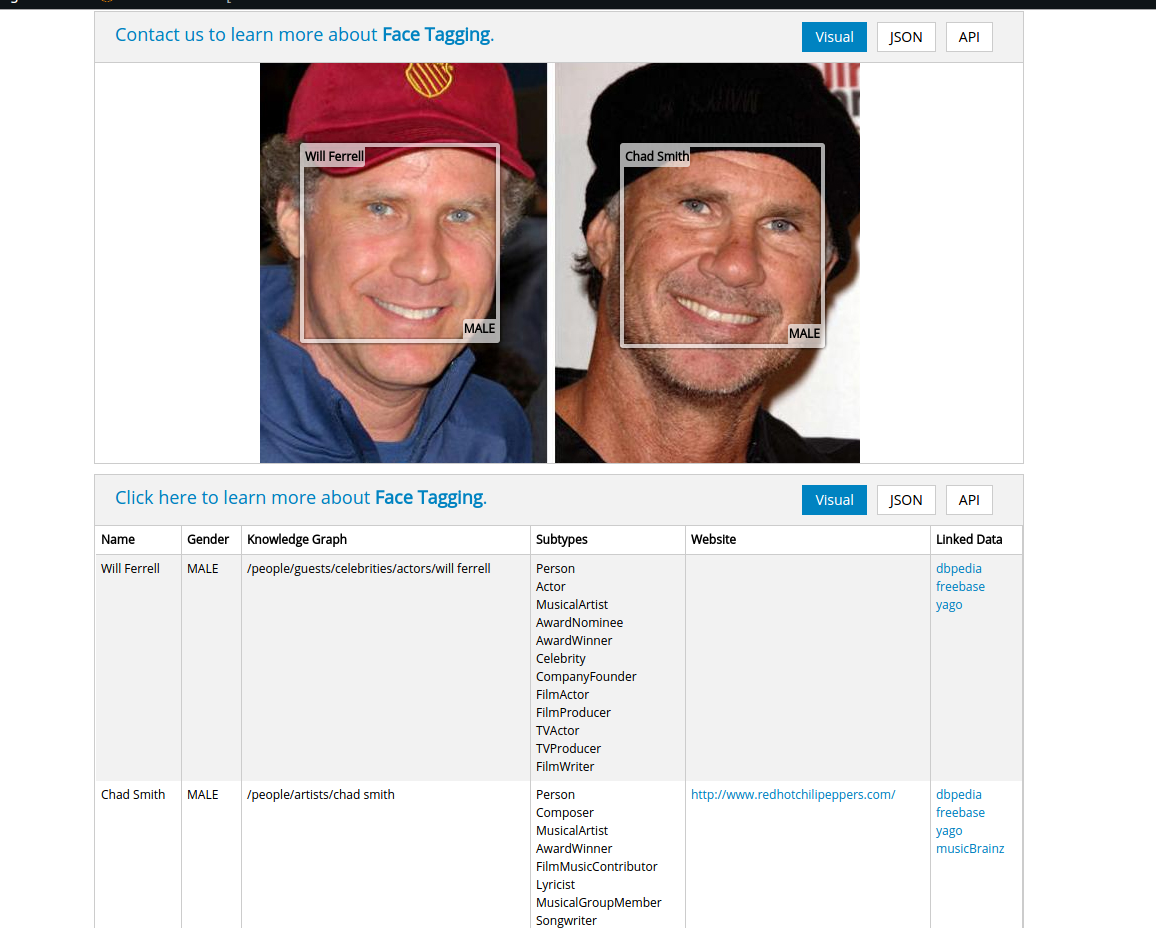

In [38]:
from IPython.display import Image 

Image('alch_faces.png')

#### Natural Language Processing

Natural language processing (NLP) is at the intersection of computer science and linguinstics- essentially having computers understand language in the way that humans can.  AlchemyLanguage integrates many NLP concenpts into a single, easy to use framework.  Their [demo](http://www.alchemyapi.com/products/demo/alchemylanguage) provides a dashboard to many NLP predictions including [sentiment](http://www.alchemyapi.com/products/alchemylanguage/sentiment-analysis) (how does this article make me feel), [entities](http://www.alchemyapi.com/products/alchemylanguage/entity-extraction) (who or what is specifically noteable in this article), [taxonomy](http://www.alchemyapi.com/products/alchemylanguage/taxonomy) (what categories of information are in the article).

<br>

Below is a screenshow from the analysis of a news article, *U.S. stocks rise with help form Apple Inc. -MarketWatch*.  The entities are organized into a slick visual, and colored by <font color="green">**positive**</font>, <font color="red"> **negative**</font>, and<font color="black"> **neutral**</font> sentiment.  The sentiment scores for each entity are shown underneath.  Other NLP categories like taxonomy are available on the side panel.  I've posted a screenshot below, [but please try it for yourself](http://www.alchemyapi.com/products/demo/alchemylanguage)!

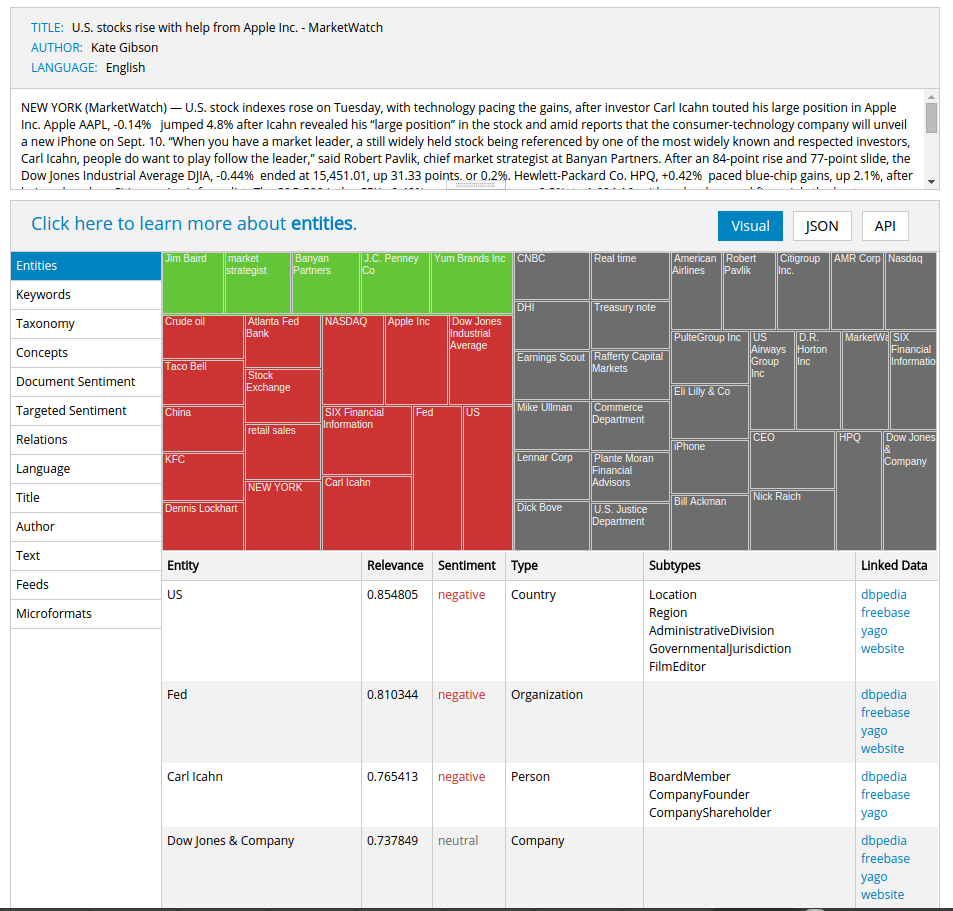

In [39]:
Image('alch_nlp.png')

We can incorporate these powerful tools into our Python workflow through Alchemy's RESTApi.  This first requires installing Alchemy's Python SDK.

#### AlchemyAPI Python SDK

**`Installation:`**

<br>

For a full guide on using Alchemy in python, [see the getting started guide](http://www.alchemyapi.com/developers/getting-started-guide/using-alchemyapi-with-python).  In summary:

    1. Register and request and API key (http://www.alchemyapi.com/api/register.html)
    2. Install from source by downloading the zip file (https://github.com/AlchemyAPI/alchemyapi_python)
       - Extract to a folder that you can access from a terminal, for example the Desktop.
       - If you are comfortable with git, just clone the repo instead.
    3. Open a terminal and cd into where you extracted the files.
    4. Type python alchemyapi.py <YOUR_API_KEY>
       - Where <YOUR_API_KEY> refers to step 1.
    5. To test it out, run the included example (python example.py)

There's currently no setup.py file, so you need to navigate to the alchemy folder to use it from the notebook.  In this case, it's on my Desktop in a folder called `alchemyapi_python`.  Let's import the api and look at its available methods.  

In [18]:
import os
cwd = os.getcwd()
os.chdir('/home/glue/Desktop/alchemyapi_python/')
from alchemyapi import AlchemyAPI as alcapi

ALCAPI = alcapi() #<-- Instantiate the api
print 'The available attributes and methods for Alchemy API are:\n%s\n\n' % '\n'.join(sorted(alcapi.__dict__.keys()))
os.chdir(cwd)

The available attributes and methods for Alchemy API are:
BASE_URL
ENDPOINTS
_AlchemyAPI__analyze
__doc__
__init__
__module__
author
category
combined
concepts
entities
faceTagging
feeds
imageExtraction
imageTagging
keywords
language
microformats
relations
s
sentiment
sentiment_targeted
taxonomy
text
text_raw
title




These are essentially the categories appearing in the NLP demo screenshot left panel.  Let's print the docstring of the `sentiment` method.  We use the shell command, `help`.

In [2]:
help(ALCAPI.sentiment)

Help on method sentiment in module alchemyapi:

sentiment(self, flavor, data, options={}) method of alchemyapi.AlchemyAPI instance
    Calculates the sentiment for text, a URL or HTML.
    For an overview, please refer to: http://www.alchemyapi.com/products/features/sentiment-analysis/
    For the docs, please refer to: http://www.alchemyapi.com/api/sentiment-analysis/
    
    INPUT:
    flavor -> which version of the call, i.e. text, url or html.
    data -> the data to analyze, either the text, the url or html code.
    options -> various parameters that can be used to adjust how the API works, see below for more info on the available options.
    
    Available Options:
    showSourceText -> 0: disabled (default), 1: enabled
    
    OUTPUT:
    The response, already converted from JSON to a Python object.



To show how this works, I've found two news articles.  The first article is about an employee winning $1000.  The second is an article about a train crash.  We can analyze these with `ALCAPI.sentiment`: 

In [3]:
FOXARTICLE = 'http://www.foxnews.com/us/2015/02/24/southern-california-commuter-train-crashes-into-truck-injuries-reported/'
GOODARTICLE = 'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/'

badnews = ALCAPI.sentiment('url', FOXARTICLE)
goodnews = ALCAPI.sentiment('url', GOODARTICLE)

print 'Article about train wreck:\n\t', badnews['docSentiment']
print '\n'
print 'Article about free money:\n\t', goodnews['docSentiment']

Article about train wreck:
	{u'mixed': u'1', u'score': u'-0.411184', u'type': u'negative'}


Article about free money:
	{u'mixed': u'1', u'score': u'0.411121', u'type': u'positive'}


It correctly predicts the overall sentiment of the article.  We can also check out the article `taxonomy`.

In [43]:
ALCAPI.taxonomy('url', FOXARTICLE)['taxonomy']

[{u'label': u'/law, govt and politics/law enforcement/police',
  u'score': u'0.566059'},
 {u'label': u'/automotive and vehicles/cars', u'score': u'0.415171'},
 {u'confident': u'no',
  u'label': u'/law, govt and politics/law enforcement',
  u'score': u'0.310581'}]

Another helpful tool is to return the just the text of the article, free of hyperlinks, images etc...  this is useful for NLP batch processing from webpages and other cluttered resources.

In [44]:
ALCAPI.text('url', FOXARTICLE)['text'][0:500] #first 500 characters

u'At least 28 people were injured, including four critically, Tuesday morning when a Metrolink commuter train collided with a tractor-trailer truck on the tracks in Ventura County, northwest of Los Angeles.\nOxnard police Sgt. Denise Shadinger said the crash was reported at 5:44 a.m. Shadinger said the truck became fully engulfed in flames. Authorities described the scene as a multi-casualty incident.\nThe 54-year-old driver of the truck, identified as Jose Alejandro Sanchez Ramirez, was later arres'

### Combining Alchemy and Tweets

Let's return to our Tweet data.  We can now perform sentiment analysis on the individual texts; however, <font color='red'>**passing all 5000 tweets will exhaust our allowed API calls**</font>.  I have an academic subscription (free upon request to AlchemyAPI) that let's me make 30000 calls a day.  Otherwise, we are limited to 1000 calls; with a subscription we can make hundreds of millions per day. 

<br>

First, let's look at a couple individual sentiments.  **We're using the extract function we've defined earlier in the Pandas analysis section**

In [45]:
kenya = extract('kenya')

kenya_0 = kenya['text'][0]
print 'First "Kenya" tweet:\n%s\n' % kenya_0
ALCAPI.sentiment('text', kenya_0)

First "Kenya" tweet:
RT @cnni: 147 killed in university massacre, deadliest terror attack in Kenya since U.S. Embassy bombed in 1998 http://t.co/ca4lefmpWT #Gar…



{u'docSentiment': {u'score': u'-0.476818', u'type': u'negative'},
 u'language': u'english',
 u'status': u'OK',
 u'totalTransactions': u'1',
 u'url': u'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/',
 u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html'}

In [46]:
obama_0 = obama['text'][0]
print 'First "Obama" tweet:\n%s\n' % obama_0
ALCAPI.sentiment('text', obama_0)

First "Obama" tweet:
RT @SaeedKD: This is quite ground-breaking: Iran's state TV is broadcasting Obama's speech live.



{u'docSentiment': {u'mixed': u'1',
  u'score': u'-0.512124',
  u'type': u'negative'},
 u'language': u'english',
 u'status': u'OK',
 u'totalTransactions': u'1',
 u'url': u'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/',
 u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html'}

Which translates to (via Google translate) "Dip. Barragan : Rocoger signatures to the letter from Obama in Easter is impertinent and insulting".  Probably not a positive sentiment really.

<br>

Let's look at the distribution of tweets for each of the four subjects, and the mean computed from summing the text of all the tweets into a single block of text and analyzing that.  <font color='red'>**If you don't have the academic subscription, the histogram below will exhaust your daily limit!**</font>

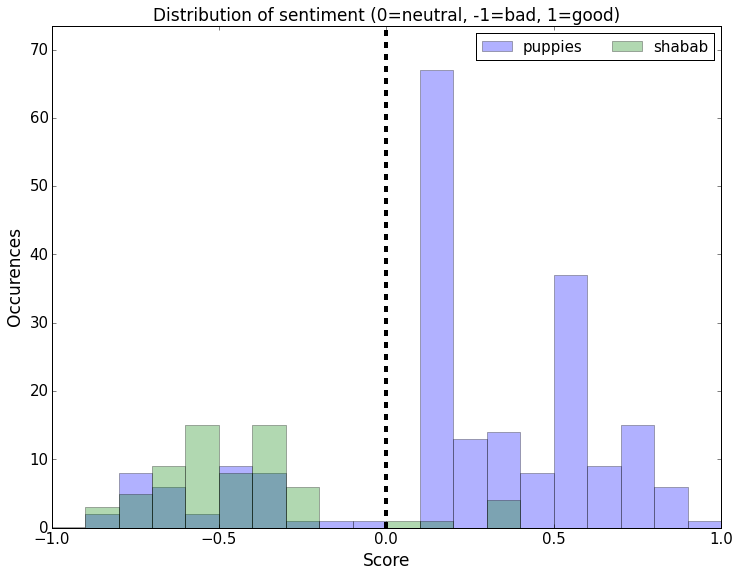

In [47]:
#http://stackoverflow.com/questions/23617129/matplotlib-how-to-make-two-histograms-have-the-same-bin-width
bins=np.histogram(np.hstack((-1,1)), bins=20)[1] #get the bin edges

for data in [puppies, shabab]:
    scores = []
    tweet_texts = data['text']
    for text in tweet_texts:
        sentiment = ALCAPI.sentiment('text', text)
        try:
            scores.append(sentiment['docSentiment']['score'])
        except KeyError:
            pass

    plt.hist(map(float, scores), bins=bins, alpha=.3)
    
# Lock x-range, scale y by 5% padding
plt.xlim(-1, 1)
ymin, ymax = plt.ylim()
plt.ylim(ymin, 1.05*ymax)

# Add legend, labels
plt.legend(['puppies', 'shabab'], loc='best', ncol=2, fontsize=15)    

# Add a vertical line
ymax = plt.ylim()[1]
plt.vlines(0, 0, ymax, lw=4, linestyle='--')

plt.title("Distribution of sentiment (0=neutral, -1=bad, 1=good)")
plt.xlabel("Score")
plt.ylabel("Occurences");

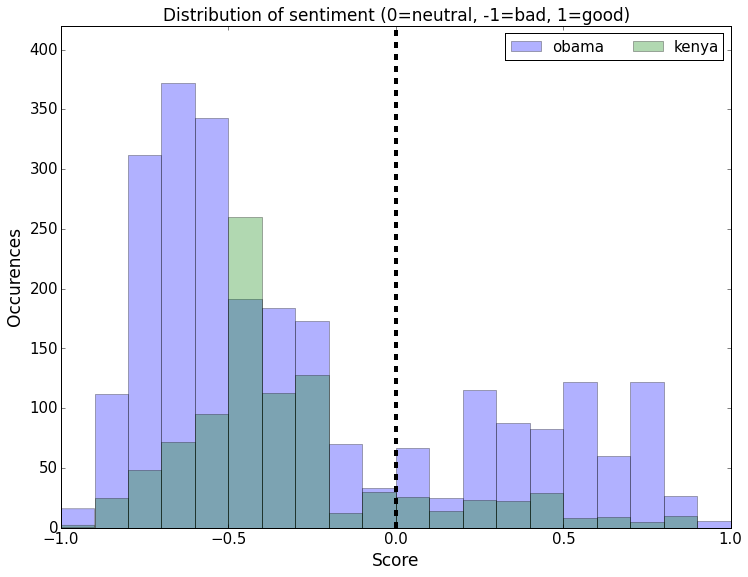

In [48]:
bins=np.histogram(np.hstack((-1,1)), bins=20)[1] #get the bin edges

for data in [obama, kenya]:
    scores = []
    tweet_texts = data['text']
    for text in tweet_texts:
        sentiment = ALCAPI.sentiment('text', text)
        try:
            scores.append(sentiment['docSentiment']['score'])
        except KeyError:
            pass

    plt.hist(map(float, scores), bins=bins, alpha=.3)
    
# Lock x-range, scale y by 5% padding
plt.xlim(-1, 1)
ymin, ymax = plt.ylim()
plt.ylim(ymin, 1.05*ymax)

# Add legend, labels
plt.legend(['obama', 'kenya'], loc='best', ncol=2, fontsize=15)    

# Add a vertical line
ymax = plt.ylim()[1]
plt.vlines(0, 0, ymax, lw=4, linestyle='--')

plt.title("Distribution of sentiment (0=neutral, -1=bad, 1=good)")
plt.xlabel("Score")
plt.ylabel("Occurences");

We can also merge all of the text into a single huge tweet, and pass this to Alchemy.  The disadvantage of this is is that it mixes language and it's not clear to me how the sentiment calculation of a string of merged tweets would be biased by the erratically changing contents.  It's still cool to try...

In [49]:
ALCAPI.sentiment('text', obama['text'].sum())

{u'docSentiment': {u'mixed': u'1',
  u'score': u'-0.397868',
  u'type': u'negative'},
 u'language': u'english',
 u'status': u'OK',
 u'totalTransactions': u'1',
 u'url': u'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/',
 u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html',
 u'warningMessage': u'truncated-oversized-text-content'}

In [50]:
ALCAPI.sentiment('text', kenya['text'].sum())

{u'docSentiment': {u'mixed': u'1', u'score': u'-0.3273', u'type': u'negative'},
 u'language': u'english',
 u'status': u'OK',
 u'totalTransactions': u'1',
 u'url': u'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/',
 u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html',
 u'warningMessage': u'truncated-oversized-text-content'}

### Image Extraction

You can use Alchemy to extract images from a webpage.  For example, the first image currently found on 9gag is...

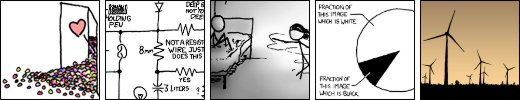

In [51]:
from IPython.display import Image
image_extract = ALCAPI.imageExtraction('url', 'www.xkcd.com')

# Use ipython's display system to render the image
Image(image_extract['image'])

### Face Tagging

Facial recognition is another important tool.  I already did [a full demo on this](http://nbviewer.ipython.org/github/hugadams/twitter_play/blob/master/FACESANDFRIENDS.ipynb), but let's go over how to pull the image into the notebook with `scikit-image`.  

<br> What's the old saying?  If you're gonna do deep learning on faces, might as well use Ryan Gosling...

In [52]:
RYAN_GOSLING_FACE = 'http://media1.s-nbcnews.com/j/streams%5C2012/April/120404%5C288504-120215-ryan-gosling.blocks_desktop_medium.jpg'
tagged = ALCAPI.faceTagging('url', RYAN_GOSLING_FACE)
tagged

{u'imageFaces': [{u'age': {u'ageRange': u'35-44', u'score': u'0.503738'},
   u'gender': {u'gender': u'MALE', u'score': u'0.995033'},
   u'height': u'276',
   u'identity': {u'disambiguated': {u'dbpedia': u'http://dbpedia.org/resource/Ryan_Gosling',
     u'freebase': u'http://rdf.freebase.com/ns/m.03m6_z',
     u'name': u'Ryan Gosling',
     u'opencyc': u'http://sw.opencyc.org/concept/Mx4rvcKRdZwpEbGdrcN5Y29ycA',
     u'subType': [u'Person',
      u'Actor',
      u'AwardNominee',
      u'AwardWinner',
      u'Celebrity',
      u'FilmActor',
      u'TVActor'],
     u'yago': u'http://yago-knowledge.org/resource/Ryan_Gosling'},
    u'name': u'Ryan Gosling',
    u'score': u'0.845535'},
   u'positionX': u'98',
   u'positionY': u'75',
   u'width': u'276'}],
 u'status': u'OK',
 u'totalTransactions': u'4',
 u'url': u'http://media1.s-nbcnews.com/j/streams%5C2012/April/120404%5C288504-120215-ryan-gosling.blocks_desktop_medium.jpg',
 u'usage': u'By accessing AlchemyAPI or using information generate

Notice this returns the `positionX` and `positionY` and `width/height`?  We can extract this rectangle using `scikit image`.  First, let's read the image into scikit image.

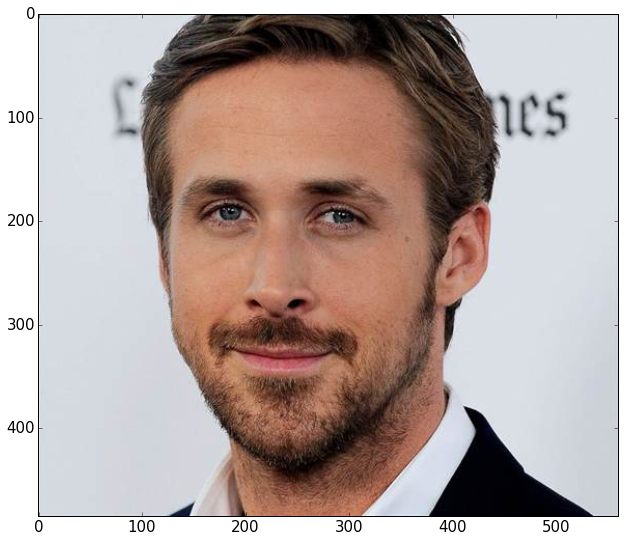

In [53]:
import skimage.io as skio

# Read into a skimage image
ryan = skio.imread(RYAN_GOSLING_FACE)
imshow(ryan);

Now we can cut and show the coordinates predicted by Alchemy.

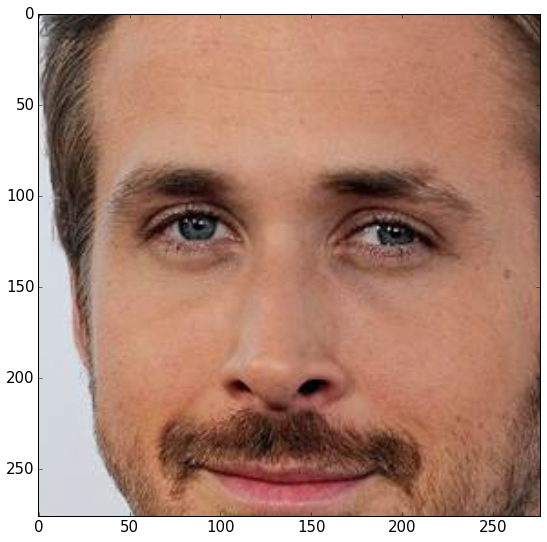

In [54]:
def _parseFace(attr):
    """ Shortcut for tagged['imageFaces'][0]['attr'] """
    return int(tagged['imageFaces'][0][attr])
    
X, Y, WIDTH, HEIGHT = _parseFace('positionX'), _parseFace('positionY'), _parseFace('width'), _parseFace('height')

# Scikit image is reversed X, Y coordinates relative to these
RYFACE = ryan[Y:Y+HEIGHT, X:X+WIDTH]
imshow(RYFACE);

And all other scikit-image functionality can be combined in our workflow. For example ,color thresholding.

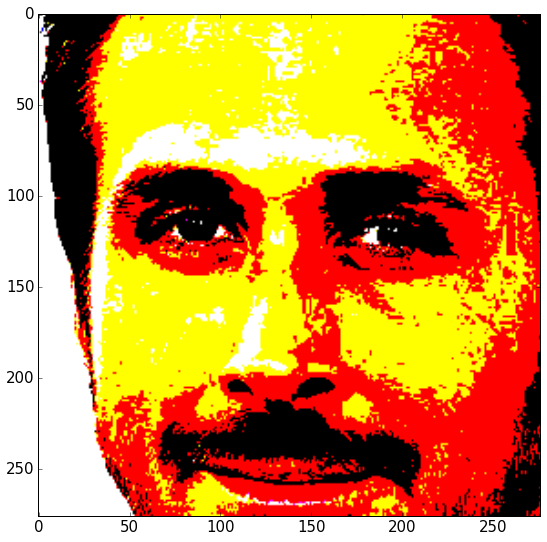

In [55]:
imshow(RYFACE > 128);

**Code below changes notebook formatting/style**

In [56]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())